In [96]:
pip install -U scikit-learn


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Accès refusé: 'c:\\programdata\\anaconda3\\lib\\site-packages\\~klearn\\linear_model\\_cd_fast.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import TimeSeriesSplit

In [2]:
data_dir  = "../dataset"

In [3]:
data_list = glob.glob(os.path.join(data_dir, '**.csv'))
data_list

['../dataset\\submission_csv_file_random_example.csv',
 '../dataset\\x_test.csv',
 '../dataset\\x_train.csv',
 '../dataset\\y_train.csv']

In [4]:
id_col = 'ID'
target_col = "target"

In [5]:
y_train = pd.read_csv("%s/y_train.csv" % data_dir, sep=",")
x_train= pd.read_csv("%s/x_train.csv" % data_dir, sep=",")
x_test=pd.read_csv("%s/x_test.csv" % data_dir, sep=",")

In [6]:
train_df  = y_train.merge(x_train, on="ID")

In [7]:
train_df.head()

,ID,target,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
0,148,-3.403606,360,0,0.000000,0.000000,0.0,0.000000,0.029317,0.000000,...,0.004521,0.015771,0.009462,0.012697,0.019507,0.005101,0.010654,0.006971,-2.307230,0.646580
1,149,-2.904798,360,1,0.000000,0.000000,0.0,0.022056,0.000000,0.036711,...,0.008817,0.006589,0.005276,0.011648,0.011829,0.015558,0.001788,0.005251,-2.263960,0.487708
2,150,-2.337807,360,2,0.000000,0.000000,0.0,0.000000,0.022267,0.000000,...,0.018640,0.020972,0.012728,0.007921,0.000643,0.029692,0.016440,0.011970,-2.343106,0.544476
3,151,-2.285676,360,3,0.000000,0.007384,0.0,0.000000,0.000000,0.007417,...,0.013628,0.020397,0.016834,0.031869,0.012468,0.065173,0.048286,0.021237,-2.331621,0.633181
4,152,-2.606321,360,4,0.088086,0.109737,0.0,0.014648,0.003662,0.036627,...,0.008228,0.013394,0.009415,0.024983,0.019524,0.018342,0.008442,0.012525,-2.415575,0.880580


In [8]:
return_cols = [c for c in train_df.columns if c.startswith("abs_ret")]
volume_cols = [c for c in train_df.columns if c.startswith("rel_vol")]
date_col = ["day"]
prod_id_col=["pid"]
other_cols = ["LS" , "NLV"]

In [9]:
train_df.describe()

,ID,target,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
count,6.844820e+05,684482.000000,684482.000000,684482.000000,679486.000000,656703.000000,657590.000000,662537.000000,660968.000000,657137.000000,...,6.489580e+05,653719.000000,6.538930e+05,652452.000000,6.526000e+05,6.530030e+05,6.539240e+05,6.545230e+05,684482.000000,684482.000000
mean,6.862229e+05,-1.958691,449.451723,412.493759,0.397610,0.329012,0.255827,0.229207,0.204163,0.187032,...,1.434824e-02,0.016687,1.608437e-02,0.015683,1.590250e-02,1.580415e-02,1.618791e-02,1.679593e-02,-3.185075,-0.018128
std,4.166922e+05,0.909245,260.605228,231.328674,0.545231,0.420742,0.334599,0.292831,0.261129,0.240466,...,1.391984e-02,0.015841,1.481085e-02,0.014791,1.488205e-02,1.491830e-02,1.495403e-02,1.551244e-02,1.072115,1.002738
min,1.480000e+02,-7.137686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.141150e-07,0.000001,5.949603e-07,0.000002,9.098018e-07,4.569935e-07,7.343371e-07,5.313111e-07,-6.984719,-4.354836
25%,3.259202e+05,-2.513789,223.000000,214.000000,0.065317,0.066504,0.051724,0.047877,0.042548,0.037688,...,6.958855e-03,0.008045,7.936303e-03,0.007633,7.835704e-03,7.782268e-03,8.040234e-03,8.348497e-03,-4.113264,-0.814604
50%,6.630995e+05,-1.948804,450.000000,419.000000,0.244965,0.204975,0.158479,0.144023,0.128535,0.117270,...,1.126555e-02,0.012979,1.274427e-02,0.012393,1.262340e-02,1.253583e-02,1.289344e-02,1.337526e-02,-3.240612,-0.064327
75%,1.006950e+06,-1.395366,676.000000,613.000000,0.538841,0.442478,0.341006,0.305395,0.273262,0.250846,...,1.743560e-02,0.020260,1.967474e-02,0.019165,1.945499e-02,1.929470e-02,1.978127e-02,2.055370e-02,-2.469952,0.731298
max,1.536859e+06,3.580919,899.000000,804.000000,22.816667,16.633565,21.975230,11.778594,19.710468,33.171913,...,5.784701e-01,0.800878,7.837354e-01,0.636200,7.874362e-01,8.171950e-01,6.851355e-01,5.611044e-01,2.763198,4.443585


In [10]:
x_test

,ID,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
0,1070752,360,805,0.318973,0.000000,0.036477,0.060808,0.121546,0.036420,0.020217,...,0.005421,0.010815,0.008139,0.012176,0.014125,0.007319,0.010002,0.009969,-1.443817,0.666302
1,1070753,360,806,0.088113,0.076165,0.016047,0.224548,0.148030,0.004007,0.012021,...,0.003653,0.027143,0.030775,0.012852,0.010340,0.013970,0.015756,0.015426,-1.733723,0.691423
2,1070754,360,807,0.215629,0.095538,0.211088,0.071851,0.229358,0.262660,0.279140,...,0.015072,0.007164,0.012834,0.005153,0.016616,0.031887,0.000413,0.025075,-1.595646,0.708518
3,1070755,360,808,0.000000,0.498306,0.031819,0.027795,0.023813,0.099198,0.067608,...,0.013314,0.020483,0.016145,0.010154,0.035758,0.013969,0.020954,0.028234,-1.495998,0.674784
4,1070756,360,809,0.052521,0.064607,0.036336,0.121153,0.108871,0.302749,0.189150,...,0.013885,0.014365,0.015316,0.005626,0.017699,0.012703,0.018457,0.014863,-1.650134,0.928211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311739,2027595,596,1147,0.099453,0.494071,0.099305,0.148810,0.000000,0.149031,0.000000,...,0.011067,0.005888,0.006395,0.010777,0.014178,0.008334,0.002919,0.012722,-3.158218,-0.771778
311740,2027596,596,1148,0.101729,0.050994,0.127389,0.153061,0.767263,0.412159,0.205656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.439334,-1.131161
311741,2027597,596,1149,0.000000,0.103627,0.832900,0.413010,0.103681,0.622730,0.000000,...,0.013367,0.005079,0.015388,0.011558,0.013544,0.009696,0.032761,0.003646,-3.171627,-1.431447
311742,2027598,596,1150,0.000000,0.669413,0.051151,0.895370,1.315789,0.102354,0.765697,...,0.074456,0.011839,0.011825,0.006356,0.024702,0.027809,0.017024,0.024792,-3.073235,-1.268934


In [11]:
# Let's analyze stock number 1
stock_1 = train_df.loc[train_df['pid'] == 1]
stock_1

,ID,target,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
73368,145244,-2.122217,1,0,0.037272,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005387,0.005473,0.021898,0.050932,0.005442,0.040114,0.021456,0.005418,-1.986009,-0.851069
73369,145245,-0.483335,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.018922,0.015108,0.002526,0.004898,0.022815,0.057084,0.003873,0.016391,-1.801845,-0.337335
73370,145246,-3.097364,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.044686,0.010542,0.039723,0.013378,0.003670,0.013264,0.002202,0.002148,-1.759012,-0.610176
73371,145247,-2.714733,1,3,0.357187,0.000000,0.012323,0.000000,0.000000,0.000000,...,0.006609,0.004383,0.005728,0.002219,0.006436,0.011048,0.009123,0.019401,-1.615954,-0.172240
73372,145248,-1.802809,1,4,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025240,0.019145,0.008298,0.016501,0.023122,0.032317,0.018517,0.020007,-1.915643,-0.533100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629513,1341132,-2.378632,1,800,0.551905,0.712965,0.340850,0.000000,0.591483,0.117540,...,0.004987,0.037660,0.011414,0.006475,0.010951,0.007477,0.003233,0.011358,-2.567767,-0.554505
629514,1341133,-2.908399,1,801,1.199166,0.463679,0.025907,0.129199,0.141935,0.180366,...,0.002159,0.009163,0.014439,0.004067,0.005220,0.012439,0.007025,0.007912,-2.426781,-0.488293
629515,1341134,-2.152086,1,802,0.471575,0.527426,0.397667,0.159659,0.026504,0.132661,...,0.009616,0.016214,0.021963,0.017083,0.017066,0.022503,0.016826,0.011247,-2.832981,-0.245936
629516,1341135,-3.093794,1,803,0.000000,2.450000,2.820065,1.452785,0.239234,0.595664,...,0.009664,0.020167,0.013257,0.013000,0.018371,0.011156,0.010370,0.009081,-1.610714,0.333201


In [12]:
stock_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 802 entries, 73368 to 629517
Columns: 128 entries, ID to NLV
dtypes: float64(125), int64(3)
memory usage: 808.3 KB


In [13]:
#stock_1.loc[:, 'day'] = pd.to_datetime(stock_1.loc[:,'day'], format="%Y/%m/%d")

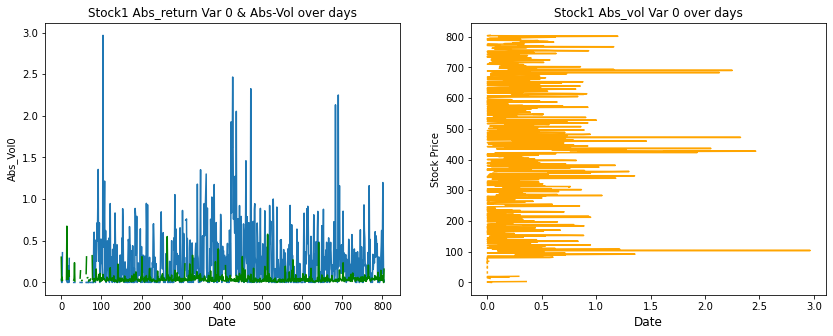

In [14]:
# Simple plotting of Stock1
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(stock_1["day"], stock_1["abs_ret0"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Abs_ret")
ax1.set_title("Stock1 Abs_return Var 0 & Abs-Vol over days")
# Second Subplot
ax1.plot(stock_1["day"], stock_1["rel_vol0"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Abs_Vol0")
ax1.set_title("Stock1 Abs_return Var 0 & Abs-Vol over days")

# Fourth Subplot
ax2.plot(stock_1["abs_ret0"], stock_1["day"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Stock1 Abs_vol Var 0 over days")
plt.show()


Var during one day of return & Vol

2 sol : index with time vector or long format

In [15]:
l = [i for i in range(60)]

In [17]:
# Let's analyze stock number 1
stock_1_day1 = stock_1.loc[stock_1['day'] == 0]
stock_1_day1

,ID,target,pid,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,...,rel_vol53,rel_vol54,rel_vol55,rel_vol56,rel_vol57,rel_vol58,rel_vol59,rel_vol60,LS,NLV
73368,145244,-2.122217,1,0,0.037272,0.0,0.0,0.0,0.0,0.0,...,0.005387,0.005473,0.021898,0.050932,0.005442,0.040114,0.021456,0.005418,-1.986009,-0.851069


In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(l, stock_1["abs_ret0"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Abs_ret")
ax1.set_title("Stock1 Abs_return Var 0 & Abs-Vol over days")

Quick strating kit

In [16]:
train_df.isnull().sum(axis=1)

0         0
1         0
2         2
3         0
4         0
         ..
684477    8
684478    4
684479    6
684480    2
684481    0
Length: 684482, dtype: int64

In [17]:
x_test.isnull().sum(axis=1)

0          0
1          0
2          0
3          0
4          0
          ..
311739     0
311740    38
311741     0
311742     0
311743     2
Length: 311744, dtype: int64

Interpoloate nan

In [22]:
#x_train.iloc[:,3:] = x_train.iloc[:,3:].interpolate(axis=1)
#x_test.iloc[:,3:]  = x_test.iloc[:,3:].interpolate(axis=1)

KeyboardInterrupt: 

In [ ]:
x_test.isnull().sum(axis=1)

In [ ]:
np.any(np.isnan(x_train))

In [ ]:
np.all(np.isfinite(x_train))

In [18]:
x_train.fillna(0, inplace=True) 
x_test.fillna(0, inplace=True)

## Feature engineering

Create basic feature

In [19]:
x_train['min_ret']    = np.min(x_train.iloc[:,3:63], axis=1)
x_train['max_ret']    = np.max(x_train.iloc[:,3:63], axis=1)
x_train['std_ret']    = np.std(x_train.iloc[:,3:63], axis=1)
x_train['median_ret'] = np.median(x_train.iloc[:,3:63], axis=1)

In [20]:
x_test['min_ret']    = np.min(x_test.iloc[:,3:63], axis=1)
x_test['max_ret']    = np.max(x_test.iloc[:,3:63], axis=1)
x_test['std_ret']    = np.std(x_test.iloc[:,3:63], axis=1)
x_test['median_ret'] = np.median(x_test.iloc[:,3:63], axis=1)

In [21]:
x_train['min_vol']    = np.min(x_train.iloc[:,64:125], axis=1)
x_train['max_vol']    = np.max(x_train.iloc[:,64:125], axis=1)
x_train['std_vol']    = np.std(x_train.iloc[:,64:125], axis=1)
x_train['median_vol'] = np.median(x_train.iloc[:,64:125], axis=1)

In [22]:
x_test['min_vol']    = np.min(x_test.iloc[:,64:125], axis=1)
x_test['max_vol']    = np.max(x_test.iloc[:,64:125], axis=1)
x_test['std_vol']    = np.std(x_test.iloc[:,64:125], axis=1)
x_test['median_vol'] = np.median(x_test.iloc[:,64:125], axis=1)

Validation

In [23]:
def Error(y_true, y_pred): 
    return np.square(y_true - y_pred)

In [24]:
def MSE(y_true, y_pred): 
    return np.square(y_true - y_pred)

In [25]:
from sklearn.model_selection import train_test_split

train_df  = y_train.merge(x_train, on="ID")
train_df.drop(['ID', 'pid'], axis=1, inplace=True)

train_X_, test_X_, train_y_, test_y_ = train_test_split(train_df.iloc[:,1:], train_df['target'], test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

regrLinWeighted = LinearRegression()
regrLinWeighted.fit(train_X_, train_y_)

LinearRegression()

In [27]:
test_X_['predict'] = regrLinWeighted.predict(test_X_)

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
(mean_squared_error(test_y_, predictions))

NameError: name 'predictions' is not defined

In [30]:
test_y_=pd.DataFrame(test_y_)

In [31]:
test_X_['error']=test_y_["target"] - test_X_['predict']

In [32]:
test_X_

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,...,min_ret,max_ret,std_ret,median_ret,min_vol,max_vol,std_vol,median_vol,predict,error
99589,41,0.000000,0.000000,0.327869,0.000000,0.000000,0.000000,0.000000,0.072464,0.018067,...,0.0,0.327869,0.061653,0.000000,0.000000,0.095894,0.020351,0.007550,-1.859037,0.498510
535740,587,0.479781,0.205128,0.000000,0.306748,0.119760,0.034165,0.136565,0.034072,0.068236,...,0.0,0.479781,0.094186,0.068143,0.005014,0.030123,0.006028,0.015041,-1.276157,0.196941
228479,230,0.709849,0.719741,0.590842,0.000000,0.587027,0.118099,0.118343,0.029595,0.265487,...,0.0,0.719741,0.162341,0.089339,0.001066,0.070583,0.010798,0.013650,-1.999648,-0.336535
214338,396,0.606290,0.151573,0.037836,0.113550,0.037893,0.151400,0.113723,0.113636,0.304183,...,0.0,0.606290,0.116823,0.075873,0.000000,0.059053,0.013184,0.012316,-1.750885,1.911004
242520,302,0.680760,0.036088,0.144456,0.108186,0.036023,0.072072,0.000000,0.216216,0.251527,...,0.0,0.680760,0.099468,0.071416,0.003962,0.064501,0.012081,0.011202,-2.089311,-0.393732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409873,494,0.042680,0.288215,0.203797,0.042740,0.053430,0.032134,0.053539,0.064212,0.032086,...,0.0,0.299369,0.064919,0.043201,0.001552,0.072420,0.013117,0.013906,-1.614390,-0.350081
675991,720,0.643777,0.086393,0.259403,0.172488,0.086096,0.301984,0.086543,0.216450,0.217014,...,0.0,0.643777,0.142153,0.131781,0.000000,0.203502,0.028475,0.008158,-1.337233,-1.358559
5086,54,0.163979,0.164249,0.027518,0.055036,0.082667,0.054945,0.054840,0.054840,0.054855,...,0.0,0.164249,0.035694,0.027304,0.002358,0.071608,0.012897,0.012157,-1.971190,0.779151
146514,378,0.480293,0.037936,0.030326,0.128798,0.030246,0.801573,0.180126,0.086460,0.334851,...,0.0,0.801573,0.144624,0.113016,0.005106,0.051718,0.008015,0.014423,-2.289628,-0.080319


In [33]:
test_X_.iloc[:,0:134]

,day,abs_ret0,abs_ret1,abs_ret2,abs_ret3,abs_ret4,abs_ret5,abs_ret6,abs_ret7,abs_ret8,...,NLV,min_ret,max_ret,std_ret,median_ret,min_vol,max_vol,std_vol,median_vol,predict
99589,41,0.000000,0.000000,0.327869,0.000000,0.000000,0.000000,0.000000,0.072464,0.018067,...,-1.453430,0.0,0.327869,0.061653,0.000000,0.000000,0.095894,0.020351,0.007550,-1.859037
535740,587,0.479781,0.205128,0.000000,0.306748,0.119760,0.034165,0.136565,0.034072,0.068236,...,-0.430984,0.0,0.479781,0.094186,0.068143,0.005014,0.030123,0.006028,0.015041,-1.276157
228479,230,0.709849,0.719741,0.590842,0.000000,0.587027,0.118099,0.118343,0.029595,0.265487,...,-0.133514,0.0,0.719741,0.162341,0.089339,0.001066,0.070583,0.010798,0.013650,-1.999648
214338,396,0.606290,0.151573,0.037836,0.113550,0.037893,0.151400,0.113723,0.113636,0.304183,...,-1.226465,0.0,0.606290,0.116823,0.075873,0.000000,0.059053,0.013184,0.012316,-1.750885
242520,302,0.680760,0.036088,0.144456,0.108186,0.036023,0.072072,0.000000,0.216216,0.251527,...,0.166484,0.0,0.680760,0.099468,0.071416,0.003962,0.064501,0.012081,0.011202,-2.089311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409873,494,0.042680,0.288215,0.203797,0.042740,0.053430,0.032134,0.053539,0.064212,0.032086,...,0.072834,0.0,0.299369,0.064919,0.043201,0.001552,0.072420,0.013117,0.013906,-1.614390
675991,720,0.643777,0.086393,0.259403,0.172488,0.086096,0.301984,0.086543,0.216450,0.217014,...,-1.119516,0.0,0.643777,0.142153,0.131781,0.000000,0.203502,0.028475,0.008158,-1.337233
5086,54,0.163979,0.164249,0.027518,0.055036,0.082667,0.054945,0.054840,0.054840,0.054855,...,0.378673,0.0,0.164249,0.035694,0.027304,0.002358,0.071608,0.012897,0.012157,-1.971190
146514,378,0.480293,0.037936,0.030326,0.128798,0.030246,0.801573,0.180126,0.086460,0.334851,...,1.747052,0.0,0.801573,0.144624,0.113016,0.005106,0.051718,0.008015,0.014423,-2.289628


In [34]:
X_tree=test_X_.iloc[:,0:134]
y_tree = test_X_.iloc[:,134:135]

In [ ]:
y_tree['day']=test_X_.iloc[:,0]

Use train_time_split

In [69]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer

In [70]:
date_series = X_tree['day']

In [72]:
min_date = date_series.min()
max_date = date_series.max()C

In [73]:
split_num = 5
date_gap_num = 1

splitter = TimeSeriesSplit(n_splits=split_num,gap=date_gap_num)

date_splits = list(splitter.split(dates))
for i, (train_dates, valid_dates) in enumerate(date_splits):
    print("Date split #{}\n train: {}\nvalid: {}\n\n".format(i, train_dates, valid_dates))

Date split #0
 train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133]
valid: [135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 

In [74]:
def get_indices_from_dates(dates):
    return [ i - 1 for i in date_series[date_series.isin(dates)].index]
split_indices = list()
for train_dates, valid_dates in date_splits:
    train_indices = get_indices_from_dates(train_dates)
    valid_indices = get_indices_from_dates(valid_dates)
    split_indices.append((train_indices, valid_indices))


In [75]:
from xgboost import XGBClassifier

# Replace with your model here, this is just a non-optimized example, with few estimators for fast run-time
model = XGBClassifier(tree_method='gpu_hist', n_estimators=3)

In [76]:
cv_scores = cross_val_score(model, X_tree.values, y_tree, cv=split_indices, scoring='neg_mean_squared_error')
print("Scores:", cv_scores, "\tmean score:", np.mean(cv_scores))

IndexError: index 228478 is out of bounds for axis 0 with size 136897

In [ ]:
def crossvalidate(data_set_path,n_test_split):
    X,y = prepare_data(data_set_path,as_retention=False)
    tscv = TimeSeriesSplit(n_splits=n_test_split)
    
    score_models = {'MSE': make_scorer(mean_squared_error)}
    xgb_model = xgb.XGBClassifier()
    test_params = { 'max_depth': [1,2,4,6],
                    'learning_rate': [0.1,0.2,0.3,0.4],
                    'n_estimators': [20,40,80,120],
                    'min_child_weight' : [3,6,9,12]}
    gsearch = GridSearchCV(estimator=xgb_model,n_jobs=-1, scoring=score_models, cv=tscv, verbose=1,
                           return_train_score=False,  param_grid=test_params,refit='AUC')
    gsearch.fit(X,y)
    result_df = pd.DataFrame(gsearch.cv_results_)
    result_df.sort_values('MSE',ascending=False,inplace=True)
    result_df['n_weights']= test_n_weights(X,y,test_params)
    result_df.to_csv(data_set_path.replace('.csv', '_crossval.csv'), index=False)
    plot_regression_test(data_set_path,result_df) 

In [ ]:
dans train train
column prediction
column error


Prediction

In [ ]:
from sklearn.linear_model import LinearRegression

regrLinWeighted = LinearRegression()
regrLinWeighted.fit(train_df.iloc[:,1:], train_df['target'])

x_test['predict'] = regrLinWeighted.predict(x_test.iloc[:,3:])

In [ ]:
predictions = x_test[['ID', 'predict']]
predictions.columns = ['ID', 'target']

In [ ]:
predictions.to_csv('predictions.csv', sep=',', index=False)

Results from this very very simple model :  3344. Soit très mauvais modèle soit prb ID/target